In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

df = pd.read_csv ('/content/Sample - Superstore (1).csv', encoding = 'latin1')
#df.head()
df.columns
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# CHANGING DATA TYPE FOR **DATE COLUMNS**

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

# CREATE **THREE NEW COLUMNS** FOR BETTER ANALYSIS

In [8]:
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order Day'] = df['Order Date'].dt.day
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

# **QUESTION 1.**
YOU NEED TO CALCULATE THE MONTHLY SALES OF THE STORE AND IDENTIFY WHICH MONTH HAD THE HIGHEST SALES AND WHICH MONTH HAD THE LOWEST SALES


In [13]:
sales_by_month = df.groupby('Order Month')['Sales'].sum()
sales_by_month

,Sales
Order Month,
1,94924.8356
2,59751.2514
3,205005.4888
4,137762.1286
5,155028.8117
6,152718.6793
7,147238.0970
8,159044.0630
9,307649.9457


# **LINEPLOT FOR MONTHLY SALES ANALYSIS**

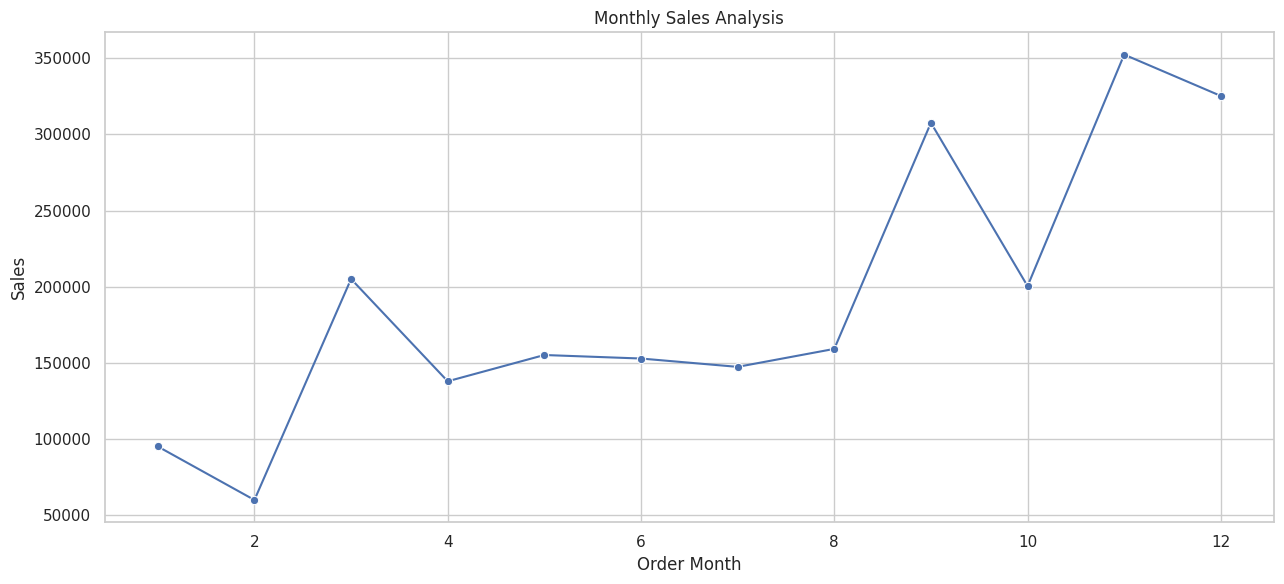

In [14]:
sales_by_month = df.groupby('Order Month')['Sales'].sum().reset_index()

plt.figure(figsize=(13,6))
sns.lineplot(x='Order Month', y='Sales', data=sales_by_month, marker='o')
plt.title('Monthly Sales Analysis')
plt.xlabel('Order Month')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


# **QUESTION 2.**

YOU NEED TO ANALYZE SALES BASED ON PRODUCT CATEGORIES AND DETEREMINE WHICH CATEGORY HAD THE LOWEST SALES AND WHICH CATEGORY HAS THE HIGHEST SALES


In [48]:
sales_by_categories = df.groupby('Category')['Sales'].sum().reset_index()
sales_by_categories

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


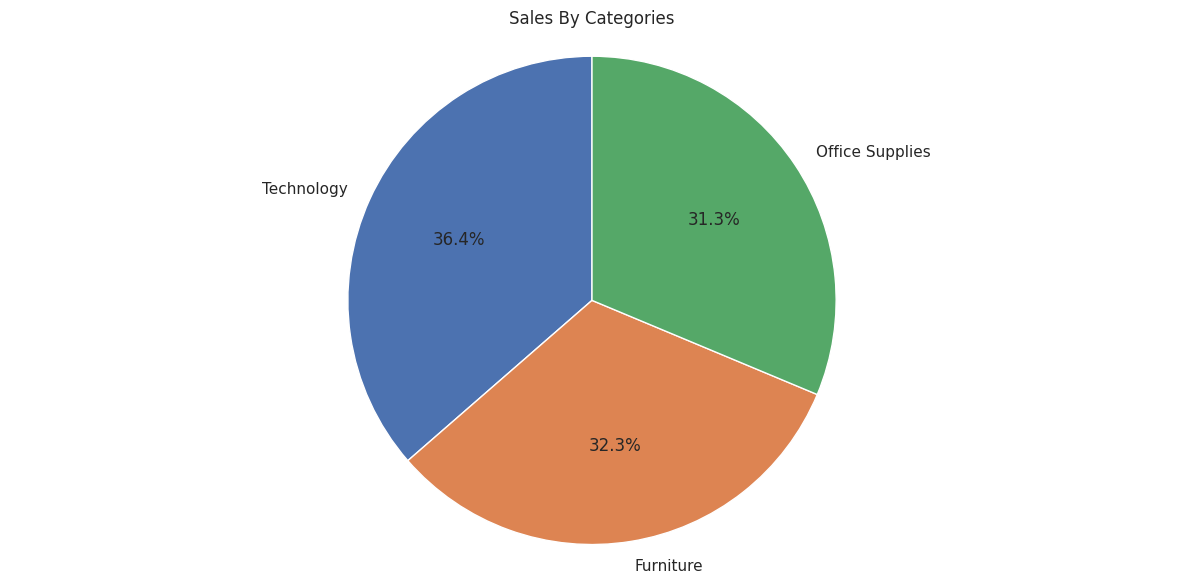

In [77]:
plt.figure(figsize=(12,6))
genre_sales = df.groupby('Category')['Sales'].sum().reset_index()
top_genres = genre_sales.sort_values(by='Sales', ascending=False).head(10)
plt.pie(top_genres['Sales'], labels=top_genres['Category'], autopct='%1.1f%%', startangle=90)
plt.title('Sales By Categories')
plt.axis('equal')
plt.tight_layout()
plt.show()



# **QUESTION 3.**

 THE SALES ANALYSIS NEEDS TO BE DONE BASED ON SUB-CATEGORIES

# *Sales analysis by sub categories*

In [21]:
sales_by_subcategories = df.groupby('Sub-Category')['Sales'].sum().reset_index()
sales_by_subcategories

,Sub-Category,Sales
0,Accessories,167380.3180
1,Appliances,107532.1610
2,Art,27118.7920
3,Binders,203412.7330
4,Bookcases,114879.9963
5,Chairs,328449.1030
6,Copiers,149528.0300
7,Envelopes,16476.4020
8,Fasteners,3024.2800
9,Furnishings,91705.1640


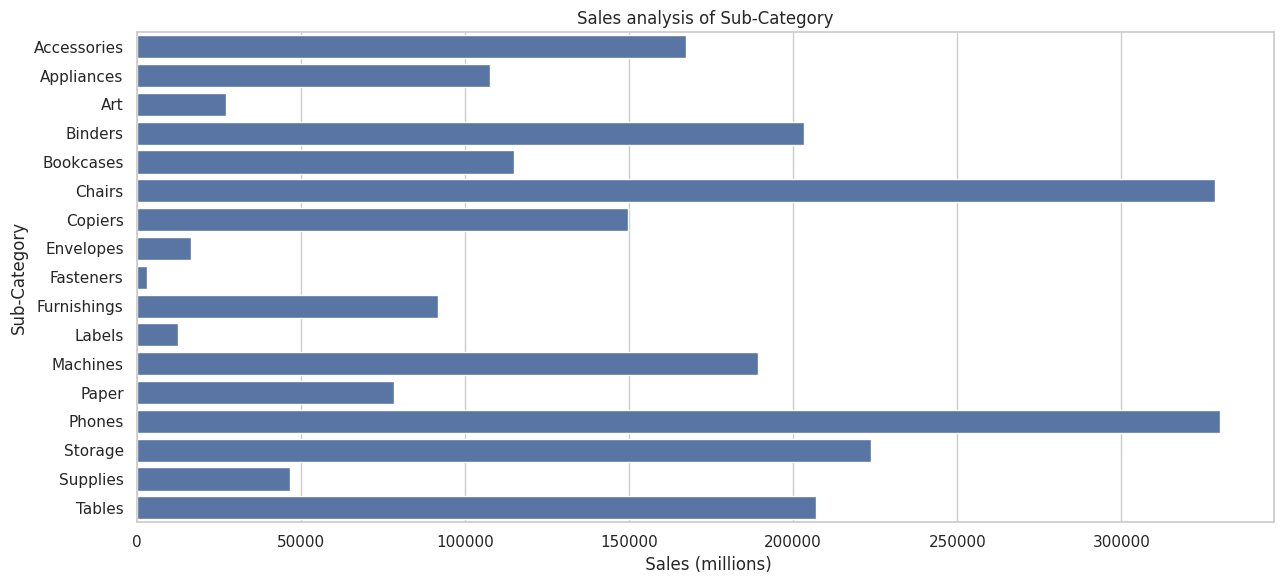

In [31]:
plt.figure(figsize=(13,6))
sns.barplot(x='Sales', y='Sub-Category', data=sales_by_subcategories)
plt.title('Sales analysis of Sub-Category')
plt.xlabel(' Sales (millions)')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.show()


# **QUESTION 4.**

 YOU NEED TO ANALYZE THE MONTHLY PROFIT FROM SALES AND DETERMINE WHICH MONTH HAD THE HIGHEST PROFIT

In [33]:
profit_by_month = df.groupby('Order Month')['Profit'].sum().reset_index()
profit_by_month

,Order Month,Profit
0,1,9134.4461
1,2,10294.6107
2,3,28594.6872
3,4,11587.4363
4,5,22411.3078
5,6,21285.7954
6,7,13832.6648
7,8,21776.9384
8,9,36857.4753
9,10,31784.0413


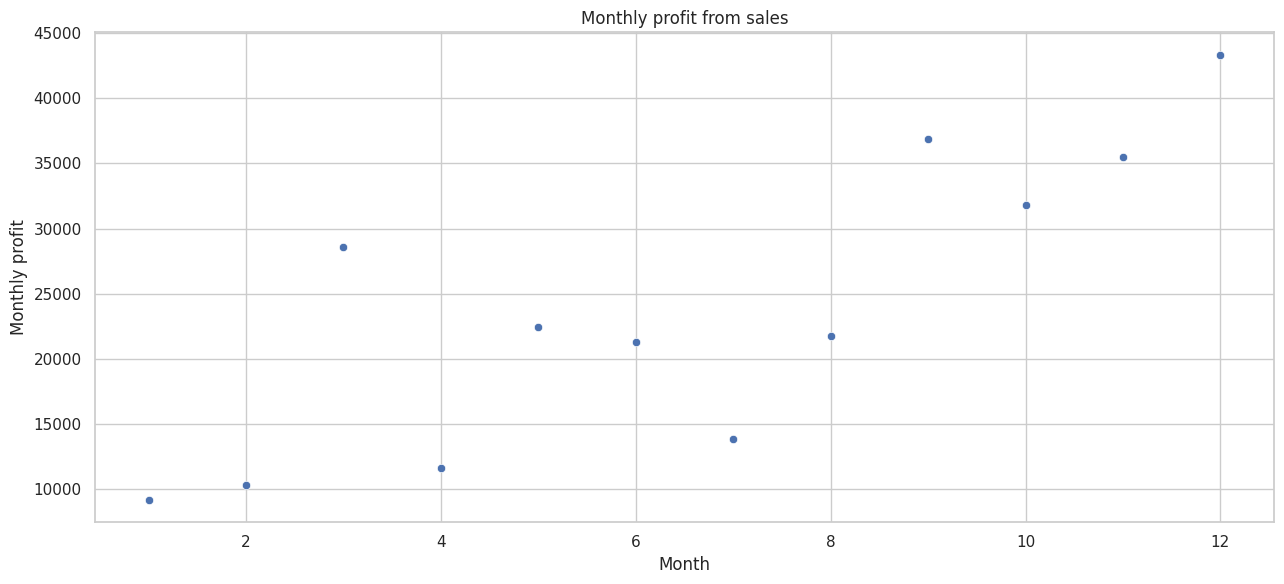

In [43]:
plt.figure(figsize=(13,6))
sns.scatterplot(x='Order Month', y='Profit', data=profit_by_month, marker='o')
plt.title('Monthly profit from sales')
plt.xlabel('Month')
plt.ylabel('Monthly profit')
plt.tight_layout()
plt.show()

# **QUESTION 5.**

 ANALYZE THE PROFIT BY CATEGORY AND SUB-CATEGORY


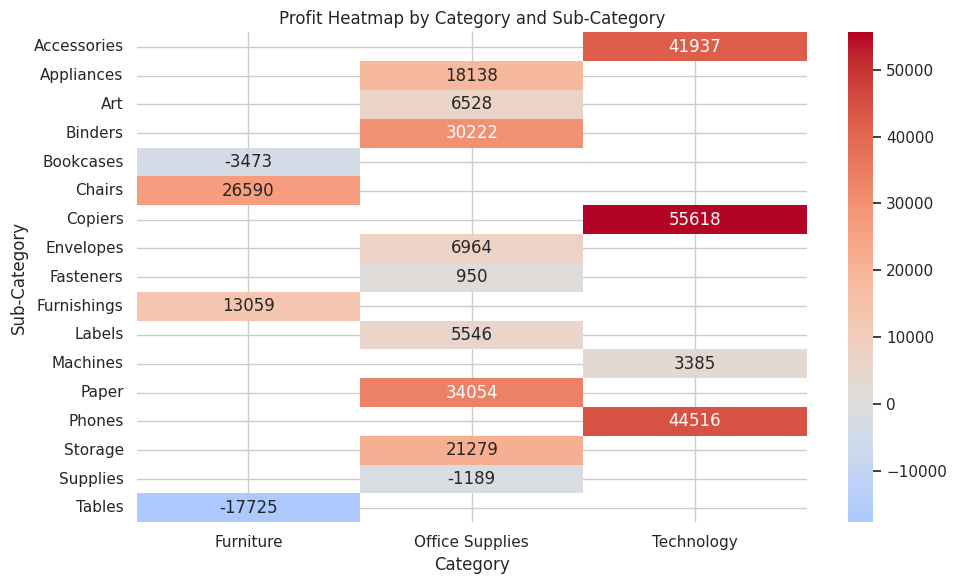

In [59]:
pivot = df.pivot_table(values='Profit', index='Sub-Category', columns='Category', aggfunc='sum')

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='coolwarm', center=0)
plt.title('Profit Heatmap by Category and Sub-Category')
plt.tight_layout()
plt.show()



# **QUESTION 6.**

 ANALYZE THE SALES AND PROFIT BY CUSTOMER SEGMENT

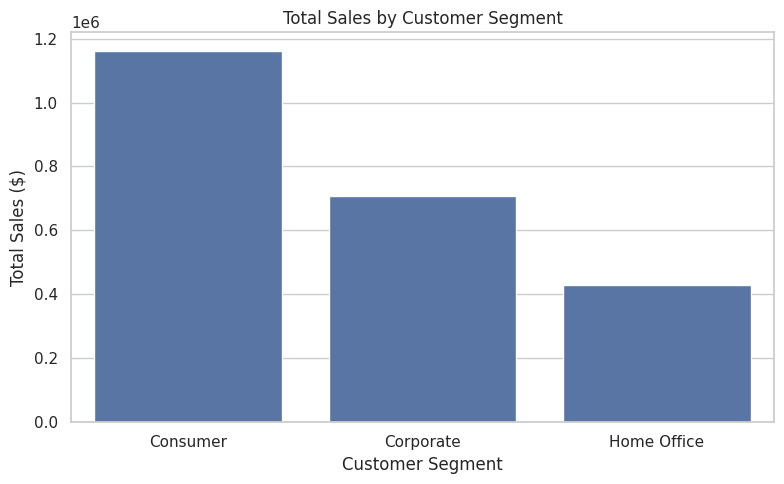

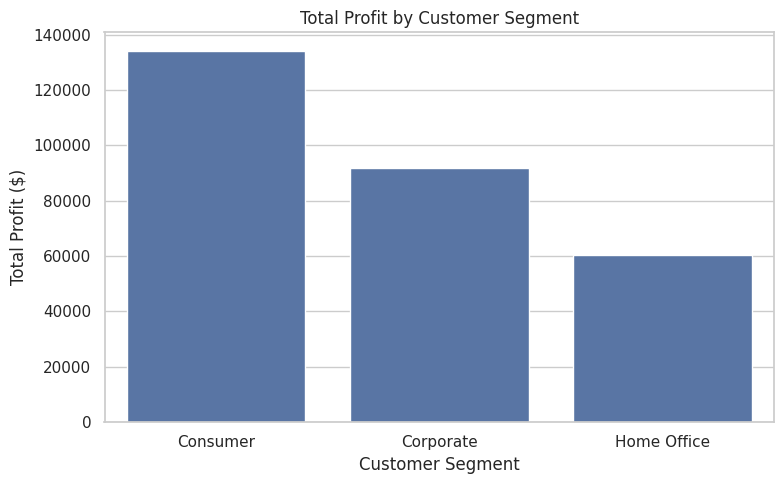

In [68]:

sales_by_segment = df.groupby('Segment')['Sales'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Segment', y='Sales', data=sales_by_segment)
plt.title('Total Sales by Customer Segment')
plt.ylabel('Total Sales ($)')
plt.xlabel('Customer Segment')
plt.tight_layout()
plt.show()


profit_by_segment = df.groupby('Segment')['Profit'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Segment', y='Profit', data=profit_by_segment)
plt.title('Total Profit by Customer Segment')
plt.ylabel('Total Profit ($)')
plt.xlabel('Customer Segment')
plt.tight_layout()
plt.show()


# **QUESTION 7.**

 ANALYZE THE SALES TO PROFIT RATIO

In [72]:
df['Profit_Margin'] = (df['Profit'] / df['Sales']) * 100
segment_margin = df.groupby('Segment')[['Profit', 'Sales']].sum().reset_index()
segment_margin['Profit_Margin (%)'] = (segment_margin['Profit'] / segment_margin['Sales']) * 100
print(segment_margin)



       Segment       Profit         Sales  Profit_Margin (%)
0     Consumer  134119.2092  1.161401e+06          11.548050
1    Corporate   91979.1340  7.061464e+05          13.025506
2  Home Office   60298.6785  4.296531e+05          14.034269


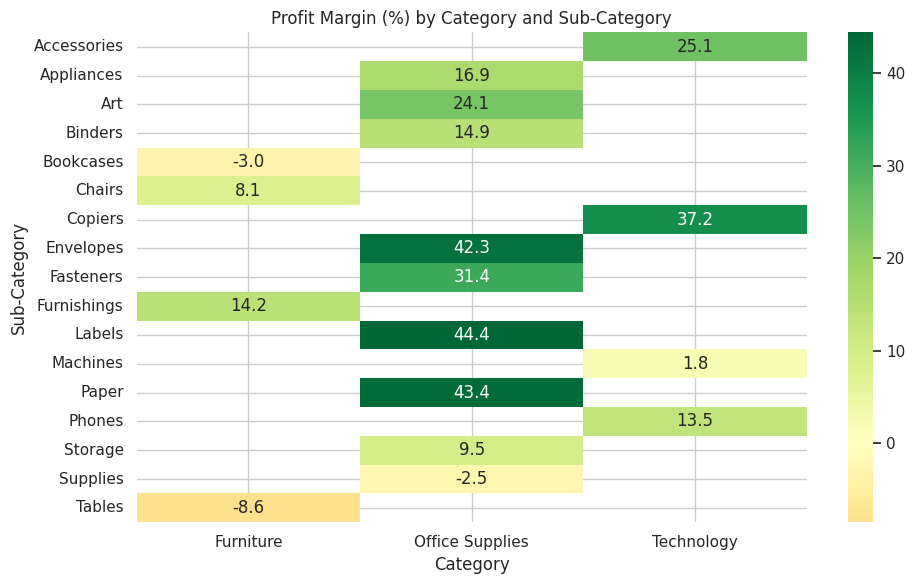

In [75]:

margin_by_subcat = df.groupby(['Category', 'Sub-Category'])[['Sales', 'Profit']].sum().reset_index()
margin_by_subcat['Profit_Margin (%)'] = (margin_by_subcat['Profit'] / margin_by_subcat['Sales']) * 100


pivot_margin = margin_by_subcat.pivot(index="Sub-Category", columns="Category", values="Profit_Margin (%)")

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(pivot_margin, annot=True, fmt=".1f", cmap='RdYlGn', center=0)
plt.title('Profit Margin (%) by Category and Sub-Category')
plt.tight_layout()
plt.show()

